In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))

Apple 0 5 ORG Companies, agencies, institutions, etc.
U.K. 27 31 GPE Countries, cities, states
$1 billion 44 54 MONEY Monetary values, including unit


In [9]:
from spacy import displacy
displacy.render(doc, style="ent") 

# NER-Tags
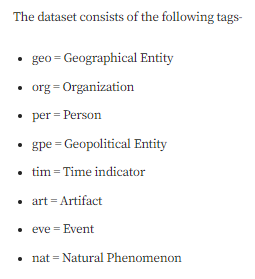

In [10]:
text = "Dear Joe! I have organized a meeting with Elon Musk from Siemens for tomorrow. Meeting place is Vienna."
doc = nlp(text)
for ent in doc.ents:
    if ent.label_ == "PERSON":
        print(ent.text)

Joe
Elon Musk


In [11]:
for token in doc:
    print(f'{token.text:10} {token.ent_iob_} {token.ent_type_}')

Dear       O 
Joe        B PERSON
!          O 
I          O 
have       O 
organized  O 
a          O 
meeting    O 
with       O 
Elon       B PERSON
Musk       I PERSON
from       O 
Siemens    B ORG
for        O 
tomorrow   B DATE
.          O 
Meeting    O 
place      O 
is         O 
Vienna     B GPE
.          O 


In [13]:
import PyPDF2 as pypdf
nlp = spacy.load('de_core_news_sm')
with open('BerichtHypo-UntersuchungskommissionKurzfassung.pdf', 'rb') as pdf:
    reader = pypdf.PdfReader(pdf)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    
    docs = nlp(text)
    #redacted_text = ''.join([token.text.replace(token.text, '[REDACTED]') if token.ent_iob_ in ['B', 'I'] and token.ent_type_ in ['PERSON'] else token.text for token in docs])
    redacted_text = ''
    for token in docs:
        if token.ent_type_ in ['PER'] and token.ent_iob_ in ['B']:
            redacted_text += '[REDACTED]'
        elif token.ent_type_ not in ['PER']:
            redacted_text += token.text
    print(redacted_text)

 
  
 
  
Bericht 
 
der unabhängigen Untersuchungskommission 
zur transparenten Aufklärung der Vorkommnisse rund um die Hypo 
Group Alpe‐Adria 
 
Kurzfassung 
 
  
 
   
Wien, 2. Dezember 2014 
   
  
 
 
 
  
 
 
 
 
 
  
 
 
 
 
 
  
 
 
 Diese Kurzfassung, eine englische Übersetzung und die Langfassung des Berichts sind unter 
[REDACTED] abrufbar. 
   
 Inhaltsverzeichnis 
A. [REDACTED] 1 
 
B. ERGEBNISSE DER UNTERSUCHUNG ................................................................................. 1 
1. Übernahme von unbeschränkten Haftungen durch das Land Kärnten .......................... 1 
2. Verkauf der HBInt an die Bayerische Landesbank (BayernLB) ........................................ 3 
3. Verstaatlichung der HBInt ............................................................................................... 6 
4. Vorgehen nach der Verstaatlichung .............................................................................. 13 
 
C. ZUSAMMENFASSUNG ................